In [37]:
import pandas as pd
import random
from copy import deepcopy
from scipy.linalg import svd, diagsvd
import numpy as np
import matplotlib.pyplot as plt

In [48]:
df = pd.read_csv('dados/ratings_small.csv')
df.drop(columns=["timestamp"], inplace=True)
df = df.pivot(index=["userId"], columns=["movieId"])
df.fillna(2.5, inplace=True)
A = df.to_numpy()
df

,userId,movieId,rating
0,1,31,2.5
1,1,1029,3.0
2,1,1061,3.0
3,1,1129,2.0
4,1,1172,4.0
...,...,...,...
99999,671,6268,2.5
100000,671,6269,4.0
100001,671,6365,4.0
100002,671,6385,2.5


In [39]:
ind = [(random.randint(0,670), random.randint(0,9065)) for i in range(1000)]

In [40]:
B = deepcopy(A)
for i,j in ind:
    B[i][j] = random.randint(0,5)

In [41]:
# for i,j in ind:
#     print(f'A: {A[i][j]}')
#     print(f'B: {B[i][j]}')

In [42]:
X, Y, Z = svd(B)

In [43]:
Y[-300:] = 0
sigma = diagsvd(Y, B.shape[0], B.shape[1])
B = X @ sigma @ Z

In [44]:
# for i,j in ind:
#     print(f'A: {A[i][j]}')
#     print(f'B: {B[i][j]}')

In [45]:
avaliacao_real = np.array([A[i][j] for i,j in ind])
avaliacao_calc = np.array([B[i][j] for i,j in ind])
erro = avaliacao_real - avaliacao_calc

In [46]:
media = np.mean(erro)
desvio_padrao = np.std(erro)
x = np.linspace(min(erro), max(erro), 100)
curva_normal = 1/(desvio_padrao * np.sqrt(2*np.pi)) * np.exp(-(x-media)**2 / (2*desvio_padrao**2))

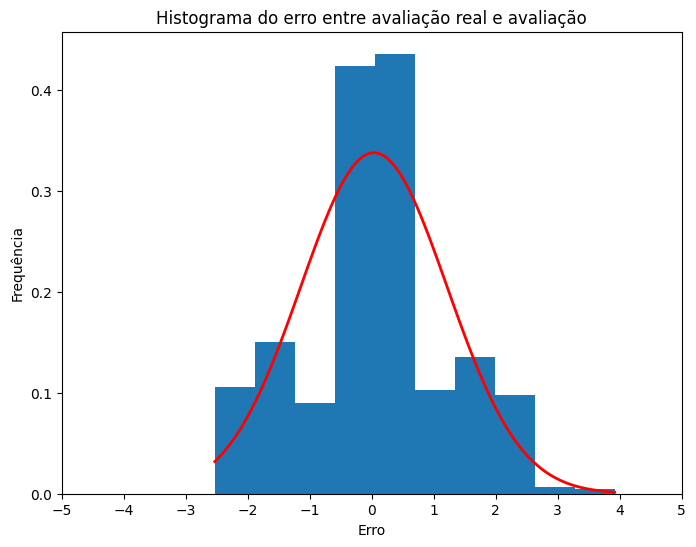

In [47]:
plt.figure(figsize=(8,6))
plt.hist(erro, bins=10, density=True)
plt.plot(x, curva_normal, 'r', linewidth=2)
plt.xlabel('Erro')
plt.ylabel('Frequência')
plt.xticks(np.arange (-5, 5.1, 1))
plt.title('Histograma do erro entre avaliação real e avaliação')
plt.show()